In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import statsmode
from sklearn import preprocessing
import datetime as dt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import SGDClassifier

In [2]:
df=pd.read_csv("oil.csv")
df

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
5,09-01-1986,26.03
6,10-01-1986,25.65
7,13-01-1986,25.08
8,14-01-1986,24.97
9,15-01-1986,25.18


In [3]:
df.dtypes

Date      object
Price    float64
dtype: object

In [4]:
df['Date']=pd.to_datetime(df.Date)

In [5]:
df['Date'].head()

0   1986-02-01
1   1986-03-01
2   1986-06-01
3   1986-07-01
4   1986-08-01
Name: Date, dtype: datetime64[ns]

In [6]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [7]:
year=df.Date.dt.year

In [8]:
month=df.Date.dt.month

In [9]:
day=df.Date.dt.day

In [10]:
#df.insert(1,column='year',value=year)

In [11]:
df['year']=year

In [12]:
df['month']=month

In [13]:
df['day']=day

In [14]:
df.head()

,Date,Price,year,month,day
0,1986-02-01,25.56,1986,2,1
1,1986-03-01,26.00,1986,3,1
2,1986-06-01,26.53,1986,6,1
3,1986-07-01,25.85,1986,7,1
4,1986-08-01,25.87,1986,8,1


In [15]:
real_x=df.iloc[:,2:5].values
real_y=df.iloc[:,1:2].values
real_x


array([[1986,    2,    1],
       [1986,    3,    1],
       [1986,    6,    1],
       ...,
       [2020,    2,   20],
       [2020,    2,   21],
       [2020,    2,   24]], dtype=int64)

In [16]:
real_y

array([[25.56],
       [26.  ],
       [26.53],
       ...,
       [53.77],
       [53.36],
       [51.36]])

In [17]:
# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
# clf.fit(real_x,real_y)

In [18]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.2,random_state=0)

In [19]:
mlr=LinearRegression()
mlr.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred_y=mlr.predict(test_x)
pred_y

array([[64.10552269],
       [60.14750709],
       [79.34838027],
       ...,
       [68.45534854],
       [56.02051972],
       [66.22168798]])

In [21]:
test_y

array([[102.33],
       [ 77.18],
       [ 53.84],
       ...,
       [ 95.82],
       [ 61.06],
       [ 96.09]])

In [22]:
test_x

array([[2012,    2,   16],
       [2010,    6,    5],
       [2019,    1,   31],
       ...,
       [2014,    1,   27],
       [2008,    7,   11],
       [2013,    1,   22]], dtype=int64)

## poly nomial

In [23]:
ploynomil_reg=PolynomialFeatures(degree=5)
real_x_poly=ploynomil_reg.fit_transform(real_x)
#real_x_poly
ploynomil_reg.fit(real_x_poly,real_y)
linear_reg2=LinearRegression()
linear_reg2.fit(real_x_poly,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
linear_reg2.predict(ploynomil_reg.fit_transform(real_x))

array([[28.59718128],
       [29.09870859],
       [29.00159361],
       ...,
       [41.50914882],
       [41.98711702],
       [42.94079184]])

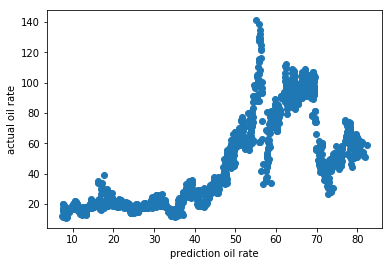

In [33]:
plt.xlabel("prediction oil rate")
plt.ylabel("actual oil rate")
plt.scatter(pred_y,test_y)
plt.show()